Numpy<a id="top"></a>
===

Numpy c'est LA librairie la plus utile quand vous souhaitez manipuler des tableaux / matrices de données. Elle est faite pour ça. Construite à partir de codes en langage C, elle est rapide et fiable. Elle intègre de nombreuses fonctions d'algèbre linaire et de statistiques afin de facilement manipuler ses tableaux et ses images... Oui, des images ! 

Bref, faisons un petit tour de la librairie !

**Sommaire**
- [Numpy & les tableaux](#chap1)
- [Concatenation](#chap2)
- [Reshape et Squeeze](#chap3)
- [Slicing et naviguer dans son tableau](#chap4)
- [Jouons avec une image](#chap5)
- [Petit tour des méthodes de base](#chap6)
- [Petit tour des fonctions de base](#chap7)
- [Stats & data foireuses](#chap8)
- [Algèbre linéaire avec Numpy](#chap9)
- [Résumons !](#chap10)
- [Exos](#exo1)


[Back to top](#top)

---

## 1. Numpy & les tableaux<a id="chap1"></a>

Voyons les deux attributs de base (`shape` et `size`), ainsi que comment créer des tableaux !

In [2]:
import numpy as np

In [3]:
# La base, le tableau !
A = np.array([1, 2, 3])
A

array([1, 2, 3])

In [4]:
# Les dimensions :
A.shape

(3,)

In [5]:
# Le nombre d'éléments !
A.size

3

In [6]:
# Pour être plus rapide, on a tendance à plutôt initialiser nos tableaux :

# Init avec que des 0
shape = (2, 3)  # Et oui, shape doit etre un tuple sachant qu'il n'est pas censé changer !
B = np.zeros(shape)
B

array([[0., 0., 0.],
       [0., 0., 0.]])

In [7]:
# Init avec que des 1
C = np.ones(shape)
C

array([[1., 1., 1.],
       [1., 1., 1.]])

In [8]:
# Init avec que des randoms (très utiles en machine learning),
# suivant une normale centrée en 0
C = np.random.randn(2, 3)
print(C)
C = np.random.randn(2, 3)
print(C)

[[-0.08041523 -0.92749785  0.07244222]
 [-1.11457705  1.12288812  1.58795416]]
[[-0.53313059  1.16426129 -1.27058745]
 [ 0.42774867  1.06186983  1.50848644]]


In [9]:
# On peut fixer le random avec seed :
seed = 55432  # la valeur de seed importe peu
np.random.seed(seed)
C = np.random.randn(2, 3)
print(C)

np.random.seed(seed)
C = np.random.randn(2, 3)
print(C)

[[ 1.16511674  0.03692048 -0.91034273]
 [-0.32650793  1.55343531  1.53697285]]
[[ 1.16511674  0.03692048 -0.91034273]
 [-0.32650793  1.55343531  1.53697285]]


In [10]:
# Matrice identité
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [11]:
# Deux autres initialisers très utiles :
print(np.linspace(0, 10, 21))  # On veut aller de 0 à 10 avec 21 éléments
print(np.arange(0, 10, .8))  # On veut aller de 0 à 10 avec un pas de 0.8

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
[0.  0.8 1.6 2.4 3.2 4.  4.8 5.6 6.4 7.2 8.  8.8 9.6]


Petite note sur l'initialisation, on peut préciser le `dtype`. Cela correspond au data type et si l'on souhaite aller vite, on va chercher moins de précision (`np.float16`) et vice versa (`np.float64`)

In [12]:
print('aie le int8...\n', np.linspace(0, 150, 10, dtype=np.int8))  # int8 est entre -128 et 127, du coup attention l'erreur !
print('\naie la précision...\n', np.linspace(0, 5, 10, dtype=np.float16)) 
print('\nOof le temps de calcul...\n', np.linspace(0, 5, 10, dtype=np.float64)) 

aie le int8...
 [   0   16   33   50   66   83  100  116 -123 -106]

aie la précision...
 [0.     0.5557 1.111  1.667  2.223  2.777  3.334  3.889  4.445  5.    ]

Oof le temps de calcul...
 [0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]


[Back to top](#top)

---

## 2. Concatenation<a id="chap2"></a>
On peut rassembler (= concatener) des matrices que ce soit horizontalement ou verticalement :

In [13]:
print(B)
print(B.shape)
print('\n')
print(C)
print(C.shape)
print('\n')
print(np.hstack((B, C)))  # horizontal stack: assemblage en horizontal
print(np.hstack((B, C)).shape)

[[0. 0. 0.]
 [0. 0. 0.]]
(2, 3)


[[ 1.16511674  0.03692048 -0.91034273]
 [-0.32650793  1.55343531  1.53697285]]
(2, 3)


[[ 0.          0.          0.          1.16511674  0.03692048 -0.91034273]
 [ 0.          0.          0.         -0.32650793  1.55343531  1.53697285]]
(2, 6)


In [14]:
print(np.vstack((B, C)))  # vertical stack: assemblage en vertical
print(np.vstack((B, C)).shape)

[[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 1.16511674  0.03692048 -0.91034273]
 [-0.32650793  1.55343531  1.53697285]]
(4, 3)


In [15]:
# On peut aussi utiliser concatenate en précisant l'axe
np.concatenate((B, C), axis=0) == np.vstack((B, C))
np.concatenate((B, C), axis=1) == np.hstack((B, C))

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

[Back to top](#top)

---

## 3. Reshape et Squeeze<a id="chap3"></a>
Parlons maintenant du reshape. Cette méthode est utile surtout pour les tableaux à une dimension avec une dimension égale à (n,). Souvent on préfère avoir (n, 1)

In [16]:

A = np.zeros((3,))
print(A.shape)
print(A, '\n')

A = A.reshape((A.shape[0], 1))
print(A.shape)
print(A, '\n')

# à l'inverse, on peut réenlever ce 1 avec squeeze :
A = A.squeeze()
print(A.shape)
print(A)

(3,)
[0. 0. 0.] 

(3, 1)
[[0.]
 [0.]
 [0.]] 

(3,)
[0. 0. 0.]


[Back to top](#top)

---

## 4. Slicing et naviguer dans son tableau<a id="chap4"></a>
Il est important de bien maitriser la navigation dans son tableau avec Numpy. Cela permet d'aisément ne selectionner que quelques données ciblées, pour les extraire, les modifier, les supprimer...  

Comme on a pu le voir dans le cours de base, il y a plusieurs techniques, soit pour aller chercher un élément en particulier (à éviter si on en souhaite plusieurs car c'est lent), soit pour aller chercher une colonne, une ligne ou un pattern de cellules. 

Voyons tout de suite cela !

In [17]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [18]:
A[1,2]  # Ligne 1 (+1), colonne 2 (+1)   ///   +1 car on compte à partir de 0 !

6

In [19]:
# Slicing [debut:fin, debut:fin]
A[:,1]  # Toute la ligne de la colonne 1

array([2, 5, 8])

In [20]:
A[:,-2:]

array([[2, 3],
       [5, 6],
       [8, 9]])

In [21]:
A = np.ones((4, 4))
A[1:-1, 1:-1] = 10
A

array([[ 1.,  1.,  1.,  1.],
       [ 1., 10., 10.,  1.],
       [ 1., 10., 10.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [22]:
A = np.ones((10, 10), dtype=np.int32)
A[1:-1:2, ::2] = 200
A

array([[  1,   1,   1,   1,   1,   1,   1,   1,   1,   1],
       [200,   1, 200,   1, 200,   1, 200,   1, 200,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1],
       [200,   1, 200,   1, 200,   1, 200,   1, 200,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1],
       [200,   1, 200,   1, 200,   1, 200,   1, 200,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1],
       [200,   1, 200,   1, 200,   1, 200,   1, 200,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1]], dtype=int32)

In [23]:
# On peut facilement faire un tableau de bool pour chercher les éléments correspondant à notre recherche:
A == 200

array([[False, False, False, False, False, False, False, False, False,
        False],
       [ True, False,  True, False,  True, False,  True, False,  True,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [ True, False,  True, False,  True, False,  True, False,  True,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [ True, False,  True, False,  True, False,  True, False,  True,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [ True, False,  True, False,  True, False,  True, False,  True,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [24]:
# Cela peut etre très utile par exemple pour le traitement d'images. On va prendre tous les pixels entre:
# - 0 et 100 et les considérer comme noirs, (= 0)
# - 100 et 155 on va le considérer gris (= 255 // 2)
# - 155 et 255 on va les considérer en blanc (= 255)
# Et voila, on a créé un gros contraste !
# Par exemple :
A[:, 2::3] = 150
A

array([[  1,   1, 150,   1,   1, 150,   1,   1, 150,   1],
       [200,   1, 150,   1, 200, 150, 200,   1, 150,   1],
       [  1,   1, 150,   1,   1, 150,   1,   1, 150,   1],
       [200,   1, 150,   1, 200, 150, 200,   1, 150,   1],
       [  1,   1, 150,   1,   1, 150,   1,   1, 150,   1],
       [200,   1, 150,   1, 200, 150, 200,   1, 150,   1],
       [  1,   1, 150,   1,   1, 150,   1,   1, 150,   1],
       [200,   1, 150,   1, 200, 150, 200,   1, 150,   1],
       [  1,   1, 150,   1,   1, 150,   1,   1, 150,   1],
       [  1,   1, 150,   1,   1, 150,   1,   1, 150,   1]], dtype=int32)

In [25]:
A[A < 100] = 0
A[(A >= 100) & (A < 155)] = 255 // 2
A[A >= 155] = 255
A

array([[  0,   0, 127,   0,   0, 127,   0,   0, 127,   0],
       [255,   0, 127,   0, 255, 127, 255,   0, 127,   0],
       [  0,   0, 127,   0,   0, 127,   0,   0, 127,   0],
       [255,   0, 127,   0, 255, 127, 255,   0, 127,   0],
       [  0,   0, 127,   0,   0, 127,   0,   0, 127,   0],
       [255,   0, 127,   0, 255, 127, 255,   0, 127,   0],
       [  0,   0, 127,   0,   0, 127,   0,   0, 127,   0],
       [255,   0, 127,   0, 255, 127, 255,   0, 127,   0],
       [  0,   0, 127,   0,   0, 127,   0,   0, 127,   0],
       [  0,   0, 127,   0,   0, 127,   0,   0, 127,   0]], dtype=int32)

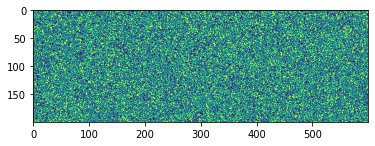

In [35]:
# Juste pour afficher l'image résultante et tester avec une image en 200*600px :
import matplotlib.pyplot as plt

A = np.random.randint(0, 255, [200, 600])
A[A < 100] = 0
A[A >= 155] = 255

plt.imshow(A.astype('uint8'))

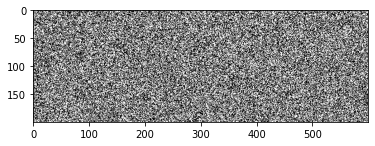

In [36]:
# Ou plutot en N&B :

plt.imshow(A.astype('uint8'), cmap='gray')

[Back to top](#top)

---

## 5. Jouons avec une image<a id="chap5"></a>
Numpy est très utile pour la manipulation d'image, pour l'IA et donc aussi pour le mix des deux : la reconnaissance d'images !

Faisons un peu joujou, tentons de transformer une image en noir et blanc, puis zoomons dessus et enfin, contrastons la beaucoup !

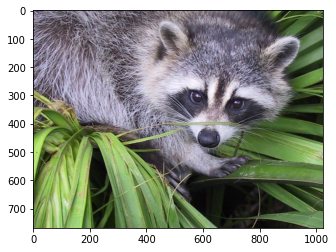

In [37]:
# Continuons sur les images et testons plus loin !
from scipy import misc

img = misc.face()
plt.imshow(img)

In [38]:
# on voit ici que l'on a des triplés de nombres car R + V + B
img

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

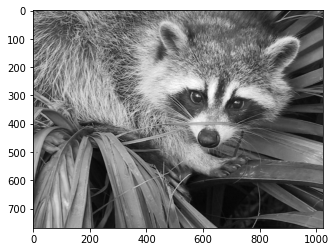

In [39]:
img_r = img[:, :, 0] 
img_v = img[:, :, 1] 
img_b = img[:, :, 2] 

# On créé un tableau en 2D
img_nb = np.array((img.shape[0], img.shape[1]))

# On récupère les infos (on additionne 1/3 de chaque couleur, et on arrondi pour garder des nombres entiers)
img_nb = np.round(img_r/3 + img_v/3 + img_b/3)

plt.imshow(img_nb.astype('uint8'), cmap='gray')

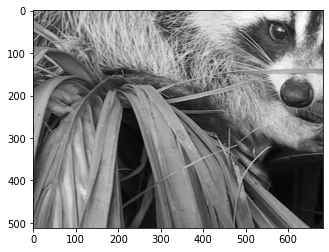

In [40]:
# Maintenant zoomons sur son visage !
img_zoom = img_nb[img_nb.shape[0]//3:img_nb.shape[0], 0:2*img_nb.shape[1]//3]
plt.imshow(img_zoom.astype('uint8'), cmap='gray')

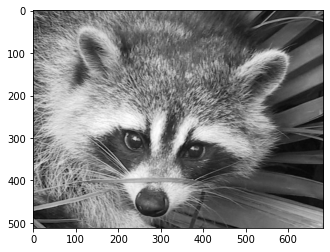

In [41]:
# Arf, mauvais zoom ! il faut inverser !
img_zoom = img_nb[0:2*img_nb.shape[0]//3, img_nb.shape[1]//3:img_nb.shape[1]]

plt.imshow(img_zoom.astype('uint8'), cmap='gray')

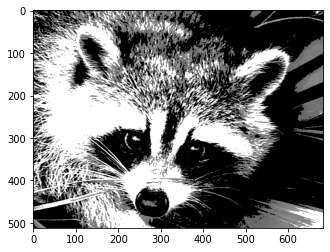

In [42]:
img_zoom[img_zoom < 100] = 0
img_zoom[img_zoom >= 155] = 255

plt.imshow(img_zoom.astype('uint8'), cmap='gray')

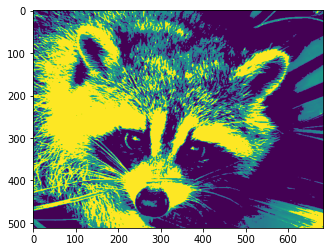

In [43]:
# Juste pour le plaisir, voyons avec les couleurs de base de matplotlib :
plt.imshow(img_zoom.astype('uint8'))

[Back to top](#top)

---

## 6. Petit tour des méthodes de base<a id="chap6"></a>

In [44]:
A = np.array([
    [1, 10, 5],
    [4, 5, 6]
])

print('sum: ', A.sum(axis=0))
print('cumulative sum: ', A.cumsum(axis=1))

print('\nprod: ', A.prod(axis=0))
print('cumulative prod: ', A.cumprod(axis=1))

print('\nmin: ', A.min(axis=0))
print('max: ', A.max(axis=1))

print('\nargmin: ', A.argmin(axis=0))
print('argmax: ', A.argmax(axis=1))

print('\nA : ', A)
print('\nsort: ', A.sort(axis=0))

print('\nA : ', A)
print('\nargsort: ', A.argsort(axis=1))

print('\nA : ', A)

sum:  [ 5 15 11]
cumulative sum:  [[ 1 11 16]
 [ 4  9 15]]

prod:  [ 4 50 30]
cumulative prod:  [[  1  10  50]
 [  4  20 120]]

min:  [1 5 5]
max:  [10  6]

argmin:  [0 1 0]
argmax:  [1 2]

A :  [[ 1 10  5]
 [ 4  5  6]]

sort:  None

A :  [[ 1  5  5]
 [ 4 10  6]]

argsort:  [[0 1 2]
 [0 2 1]]

A :  [[ 1  5  5]
 [ 4 10  6]]


[Back to top](#top)

---

## 7. Petit tour des fonctions de base<a id="chap7"></a>

In [45]:
A = np.random.randint(0, 10, [5,3])
np.cos(A) # on a aussi sin, sinh, cosh, exp...

array([[ 0.75390225,  0.54030231,  0.28366219],
       [-0.91113026, -0.41614684, -0.14550003],
       [-0.65364362, -0.91113026,  0.96017029],
       [ 0.54030231,  0.28366219,  1.        ],
       [ 0.54030231, -0.91113026, -0.14550003]])

In [46]:
# Répétitions dans le tablau
np.unique(A, return_counts=True)

(array([0, 1, 2, 4, 5, 6, 7, 8, 9]), array([1, 3, 1, 1, 2, 1, 1, 2, 3]))

In [47]:
values, counts = np.unique(A, return_counts=True)
counts.argsort()  # on cherche a trier les nombres d'apparition des différents chiffres
values[counts.argsort()] # tri les nombre selon leur nombre d'apparition !

array([0, 2, 4, 6, 7, 5, 8, 1, 9])

In [48]:
# On peut donc faire :
for v, c in zip(values[counts.argsort()], counts[counts.argsort()]):
    print(f'{v} apparait {c} fois')

0 apparait 1 fois
2 apparait 1 fois
4 apparait 1 fois
6 apparait 1 fois
7 apparait 1 fois
5 apparait 2 fois
8 apparait 2 fois
1 apparait 3 fois
9 apparait 3 fois


[Back to top](#top)

---

## 8. Stats & data foireuses<a id="chap8"></a>
De base, Numpy propose tout ce qu'il faut pour des stats de base:

In [49]:
# Statistics
np.corrcoef(A)  # Indique la correlation entre les différentes lignes / colonnes / les différentes lignes entre elles /  les différentes colonnes entre elles

array([[ 1.        ,  0.97986371, -0.99717646, -0.8660254 , -0.82603319],
       [ 0.97986371,  1.        , -0.96210321, -0.94842061, -0.69686305],
       [-0.99717646, -0.96210321,  1.        ,  0.82603319,  0.8660254 ],
       [-0.8660254 , -0.94842061,  0.82603319,  1.        ,  0.43355498],
       [-0.82603319, -0.69686305,  0.8660254 ,  0.43355498,  1.        ]])

Cependant, il arrive d'avoir des data manquantes, cassées, mauvaises ou tout autre cas conduisant à avoir quelques éléments non exploitables. Alors que faire ?
-> Jeter le data set ? ah non on en a besoin ! 
-> Nettoyer tout un a un ? Oui mais en remplaçant par quoi ?
-> Se résigner et utiliser une boucle for pour parcourir les données et skip les mauvaises ? Et si on a un énorme dataset ? on va attendre des heures ? meh...

Et bien Numpy propose aussi une solution ! Les "nan fonctions" (enfin j'appelle ça comme ça ahah) :

In [50]:
A = np.array([
    [1,2, np.nan],
    [7,6, 5],
    [12,np.nan, 6]
])
A

array([[ 1.,  2., nan],
       [ 7.,  6.,  5.],
       [12., nan,  6.]])

In [51]:
np.nanmean(A, axis=1)

array([1.5, 6. , 9. ])

In [52]:
np.nanmedian(A)

6.0

Numpy va donc juste skip les `nan` !   

On peut aussi les récupérer pour ensuite les traiter :

In [53]:
np.isnan(A)

array([[False, False,  True],
       [False, False, False],
       [False,  True, False]])

In [54]:
print('nb de NaN : ', np.isnan(A).sum())
print('% de NaN : ', np.isnan(A).sum()/A.size)

nb de NaN :  2
% de NaN :  0.2222222222222222


In [55]:
# Maintenant pour les supprimer, on peut réutiliser les techniques vus précédemment :
A[np.isnan(A)] = 42
A

array([[ 1.,  2., 42.],
       [ 7.,  6.,  5.],
       [12., 42.,  6.]])

[Back to top](#top)

---

## 9. Algèbre linéaire avec Numpy<a id="chap9"></a>

Plein de fonctions sur matrices sont aussi disponibles, que ce soit dans le module `linalg` ou de base :

In [56]:
# La transposée
A.T  # Oui, c'est un attribut de la classe np.array !

array([[ 1.,  7., 12.],
       [ 2.,  6., 42.],
       [42.,  5.,  6.]])

In [57]:
# Le produit matriciel ;
A.dot(A)

array([[ 519., 1778.,  304.],
       [ 109.,  260.,  354.],
       [ 378.,  528.,  750.]])

In [58]:
# Le déterminant 
np.linalg.det(A)

9185.999999999989

In [59]:
# Inversion
np.linalg.inv(A)

array([[-0.01894187,  0.19072502, -0.02634444],
       [ 0.0019595 , -0.05421293,  0.03146092],
       [ 0.02416721, -0.0019595 , -0.00087089]])

In [60]:
A.dot(np.linalg.inv(A))

array([[ 1.00000000e+00, -1.21430643e-17,  7.15573434e-18],
       [-6.93889390e-18,  1.00000000e+00,  8.78203760e-18],
       [ 1.38777878e-17, -3.62557206e-16,  1.00000000e+00]])

In [61]:
np.linalg.pinv(A)

array([[-0.01894187,  0.19072502, -0.02634444],
       [ 0.0019595 , -0.05421293,  0.03146092],
       [ 0.02416721, -0.0019595 , -0.00087089]])

In [62]:
# Valeurs et vecteurs propres
np.linalg.eig(A)

(array([ 37.59051548+0.j        , -12.29525774+9.65384844j,
        -12.29525774-9.65384844j]),
 array([[ 0.73383231+0.j        ,  0.90390307+0.j        ,
          0.90390307-0.j        ],
        [ 0.26182135+0.j        , -0.18697552-0.15749207j,
         -0.18697552+0.15749207j],
        [ 0.62684904+0.j        , -0.27723032+0.21526494j,
         -0.27723032-0.21526494j]]))

[Back to top](#top)

---

## 10. Résumons !<a id="chap10"></a>

Bref, Numpy c'est vraiment LA librairie mathématique quand on veut manipuler des tableaux (ou de matrices). Elle est puissante, elle est rapide (merci la programmation en C) et elle est surtout bien pensée.

Ce qu'il faut surtout retenir c'est :
- L'axe de ses tableaux:
    - 0: vertical
    - 1: horizontal
    - 2+ : le reste
- Les attributs `shape` (les dimensions du tableau, toujours important de les vérifier et de les maitriser) et `size` (le nombre d'éléments)
- Les constructeurs :
    - `np.array(list, dtypes)` utile pour la convertion list -> np.array
    - `np.zeros((shape), dtype)` utile pour créer un tableau de 0
    - `np.ones((shape), dtype)` utile pour créer un tableau de 1
    - `np.random.randn(shape)` utile pour créer un tableau de nombre randoms suivant une normale
- La méthode `reshape((shape))` pour changer les dimensions d'un tableau
- La méthode `concatenate(axis=int)` pour assembler des tableaux
- Les méthodes statistiques :
    - `min(axis=int)`  la valeur minimale de chaque axes
    - `argmin(axis=int)` l'index de la valeur minimale de chaque axes
    - `max(axis=int)`  la valeur maximale de chaque axes
    - `argmax(axis=int)` l'index de la la valeur maximale de chaque axes
    - `mean(axis=int)` la valeur moyenne de chaque axes
    - `std(axis=int)`  l'écart type (standard dérivation) de chaque axes
    - `sum(axis=int)`  la somme de chaque valeurs de chaque axes
- Le tri :
    - `sort(axis)`
    - `argsort(axis)`
    
- L'indexing: `array[array>0]`

[Back to top](#top)

---
---

## Petit Exos<a id="exo1"></a>

1. standardisation (moyenne = 0 et écart-type = 1) de la matrice sur chaque colonne (selon la méthode Z-score Normalization)

$$
x' = \frac{x - \overline{x}}{\sigma}
$$

In [63]:
np.random.seed(0)
A = np.random.randint(0, 100, [10, 5])
A

array([[44, 47, 64, 67, 67],
       [ 9, 83, 21, 36, 87],
       [70, 88, 88, 12, 58],
       [65, 39, 87, 46, 88],
       [81, 37, 25, 77, 72],
       [ 9, 20, 80, 69, 79],
       [47, 64, 82, 99, 88],
       [49, 29, 19, 19, 14],
       [39, 32, 65,  9, 57],
       [32, 31, 74, 23, 35]])

In [64]:
B = (A - A.mean(axis=0)) / A.std(axis=0)

B

array([[-0.02206157,  0.        ,  0.13173823,  0.72539252,  0.10755798],
       [-1.56637126,  1.61579632, -1.48676006, -0.33034307,  0.96802178],
       [ 1.12513992,  1.84021247,  1.03508612, -1.14768676, -0.27965074],
       [ 0.90452425, -0.35906585,  0.99744662,  0.0102168 ,  1.01104497],
       [ 1.6104944 , -0.44883231, -1.33620208,  1.0659524 ,  0.32267393],
       [-1.56637126, -1.21184724,  0.73397016,  0.7935045 ,  0.62383626],
       [ 0.11030784,  0.76301493,  0.80924915,  1.81518411,  1.01104497],
       [ 0.1985541 , -0.80789816, -1.56203905, -0.90929485, -2.17267111],
       [-0.24267724, -0.67324847,  0.16937773, -1.24985473, -0.32267393],
       [-0.55153918, -0.7181317 ,  0.50813319, -0.77307091, -1.26918412]])

In [65]:
# normalement la moyenne doit etre proche de 0 et l'écart type de 1 :
B.mean(axis=0), B.std(axis=0)

(array([-2.22044605e-17, -4.44089210e-17,  0.00000000e+00, -1.22124533e-16,
        -4.44089210e-17]),
 array([1., 1., 1., 1., 1.]))

---

### Exo 2

Créons des jeux de données et visualisons les !

In [66]:
dataset = {f"Exeprience {i}": np.random.randn(100,1) for i in range(2)}

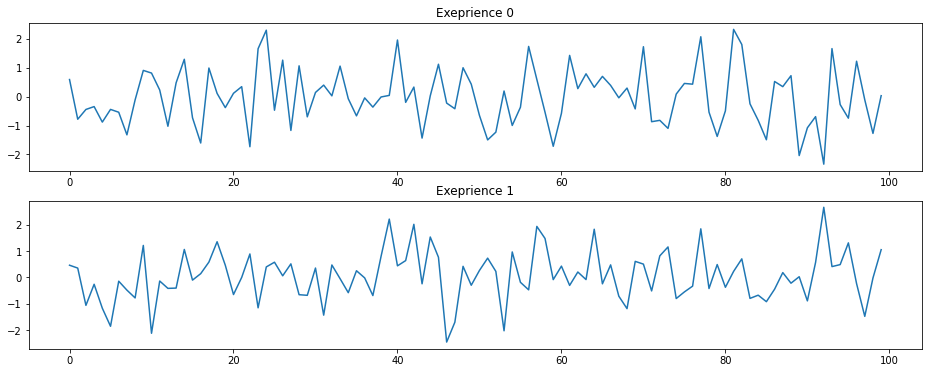

In [67]:
def plot(dataset, heigh=5):
    plt.figure(figsize=(16, len(dataset.keys())*heigh))
    n = len(dataset)
    
    for key, subplot in zip(dataset.keys(), range(n)):
        plt.subplot(n, 1, subplot + 1)
        plt.plot(dataset[key])
        plt.title(key)
        
    plt.show
    
plot(dataset, heigh=3) 

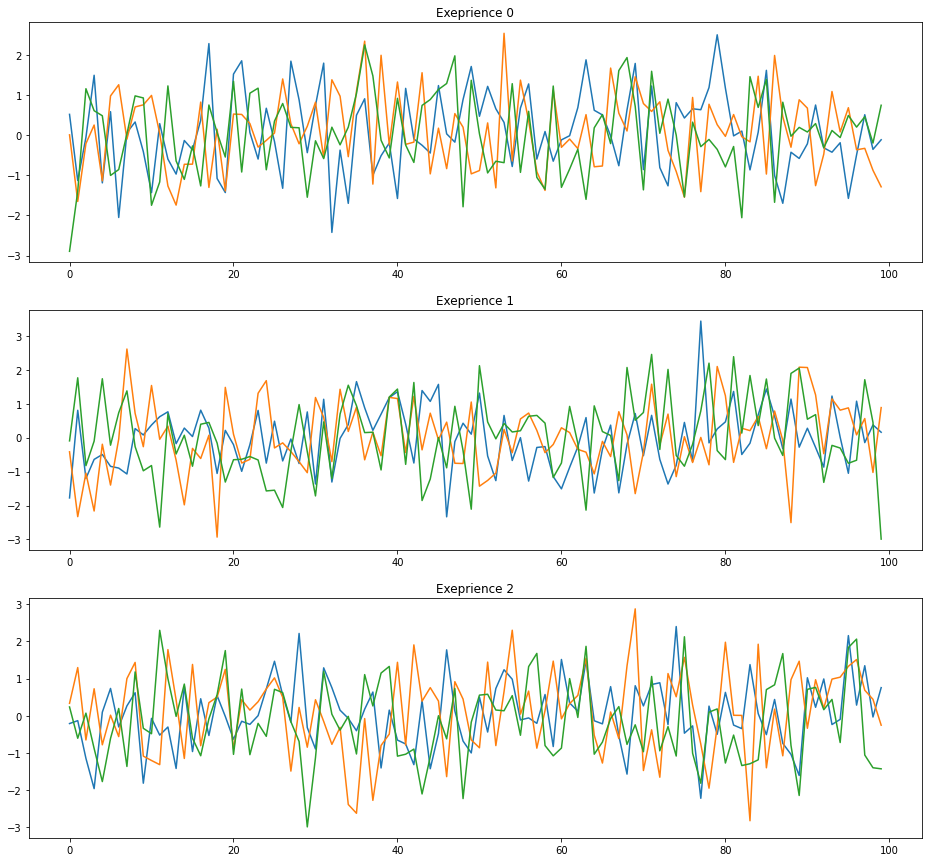

In [68]:
# Ce qui est puissant, c'est de facilement pouvoir rajouter des expériences...
# 3 experiences :
dataset = {f"Exeprience {i}": np.random.randn(100,1) for i in range(3)}

# ... ou des courbes !
# 3 jeux de données et 3 expériences :
dataset = {f"Exeprience {i}": np.random.randn(100,3) for i in range(3)}

plot(dataset)

[Back to top](#top)

---

Thibault **Santonja**  
2021